In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import datetime
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
# Create 8 dataframes, one for each .csv file
df1 = pd.read_csv('2018_01_01 to 2018_02_28.csv')
df2 = pd.read_csv('2018_03_01 to 2018_09_30.csv')
df3 = pd.read_csv('2018_10_01 to 2019_05_31.csv')
df4 = pd.read_csv('2019_06_01 to 2019_12_31.csv')
df5 = pd.read_csv('2020_01_01 to 2020_07_31.csv')
df6 = pd.read_csv('2020_08_01 to 2021_02_28.csv')
df7 = pd.read_csv('2021_03_01 to 2021_08_31.csv')
df8 = pd.read_csv('2021_09_01 to 2022_04_20.csv')

In [3]:
# Create a list of our 8 dataframes
df_list = [df1, df2, df3, df4, df5, df6, df7, df8]

In [4]:
#master_data

In [5]:
master_data = pd.concat(df_list, ignore_index=True)
# master_data.tail()
master_data.to_csv('CountyMasterFile.csv')

In [6]:
master_data['High Schl'].unique()

array(['River Ridge', 'Creekview', 'Sequoyah', 'Cherokee', 'Woodstock',
       'Etowah', 'Other'], dtype=object)

In [7]:
clean_master = pd.read_csv("CountyMasterFile_cleaned.csv")
clean_master

,Unnamed: 0,Status,Area,Sub,City,Postal Code,Sold Price,OLP,List Price,Price,...,Property Type,Property Subtype,OnMktDate,OMD,Clsd Date,Elem Schl,Middle Schl,High Schl,delta,DOM_actual
0,0,Sold,113 - CHK3,Longleaf Woodstock,Woodstock,30188,499957,475900,475900,499957,...,Residential,Single Family Residence,2017-10-20,2017-11-02,2/28/2018,Little River,Mill Creek,River Ridge,105.055054,13
1,1,Sold,113 - CHK3,None,Canton,30115-7057,575000,600000,600000,575000,...,Residential,Single Family Residence,2017-10-09,2017-11-26,1/5/2018,Avery,Creekland,Creekview,95.833333,48
2,2,Sold,113 - CHK3,None,Canton,30115-6577,130600,155000,149900,130600,...,Residential,Single Family Residence,2017-11-03,2018-01-05,1/30/2018,Avery,Creekland,Creekview,84.258065,63
3,4,Sold,113 - CHK3,Cherokee Reserve,Canton,30115-4760,305000,310000,305000,305000,...,Residential,Single Family Residence,2017-09-14,2018-01-18,2/27/2018,Hickory Flat,Dean Rusk,Sequoyah,98.387097,126
4,5,Sold,113 - CHK3,The Sanctuary,Woodstock,30188-9,516000,518725,516725,516000,...,Residential,Single Family Residence,2017-08-27,2017-12-17,1/10/2018,Arnold Mill,Mill Creek,River Ridge,99.474673,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18732,20330,Sold,111 - CHK1,Riverstone Commons,Canton,30114,255000,255000,255000,255000,...,Residential,Townhouse,2022-01-13,2022-01-13,2/28/2022,R M Moore,Teasley,Cherokee,100.000000,0
18733,20331,Sold,111 - CHK1,Mountain Brook,Woodstock,30188,351200,348100,348100,351200,...,Residential,Townhouse,2022-02-17,2022-02-28,3/18/2022,Arnold Mill,Mill Creek,River Ridge,100.890549,11
18734,20332,Sold,113 - CHK3,Bellehaven,Woodstock,30188,417500,380000,380000,417500,...,Residential,Townhouse,2022-03-10,2022-03-14,4/12/2022,Arnold Mill,Mill Creek,River Ridge,109.868421,4
18735,20333,Sold,112 - CHK2,Lantern Walk,Ball Ground,30107,292000,290000,290000,292000,...,Residential,Townhouse,2022-03-10,2022-03-18,4/18/2022,Ball Ground,Creekland,Creekview,100.689655,8


In [8]:
clean_master["Property Subtype"].value_counts()

Single Family Residence                 16986
Townhouse                                1287
Townhouse, Condominium                    291
Condominium                               120
Mobile Home                                34
Townhouse, Single Family Residence         12
Condominium, Townhouse                      6
Mobile Home, Single Family Residence        1
Name: Property Subtype, dtype: int64

In [9]:
#get all mobile home to be same category
clean_master["Property Subtype"] = clean_master["Property Subtype"].replace({'Mobile Home, Single Family Residence': 'Mobile Home'})
clean_master["Property Subtype"].value_counts()

Single Family Residence               16986
Townhouse                              1287
Townhouse, Condominium                  291
Condominium                             120
Mobile Home                              35
Townhouse, Single Family Residence       12
Condominium, Townhouse                    6
Name: Property Subtype, dtype: int64

In [10]:
#repeat last step for townhouse/condo
clean_master["Property Subtype"] = clean_master["Property Subtype"].replace({'Townhouse': 'Townhouse/Condominium', 'Townhouse, Condominium': 'Townhouse/Condominium', 'Condominium': 'Townhouse/Condominium', 'Townhouse, Single Family Residence': 'Townhouse/Condominium', 'Condominium, Townhouse': 'Townhouse/Condominium'})
clean_master["Property Subtype"].value_counts()

Single Family Residence    16986
Townhouse/Condominium       1716
Mobile Home                   35
Name: Property Subtype, dtype: int64

In [11]:
clean_master.loc[:,['Clsd Date', 'Property Subtype']]

,Clsd Date,Property Subtype
0,2/28/2018,Single Family Residence
1,1/5/2018,Single Family Residence
2,1/30/2018,Single Family Residence
3,2/27/2018,Single Family Residence
4,1/10/2018,Single Family Residence
...,...,...
18732,2/28/2022,Townhouse/Condominium
18733,3/18/2022,Townhouse/Condominium
18734,4/12/2022,Townhouse/Condominium
18735,4/18/2022,Townhouse/Condominium


In [12]:
subtype_df = clean_master.loc[:,['Clsd Date', 'Property Subtype', 'Sold Price','List Price','DOM_actual']]

subtype_df

,Clsd Date,Property Subtype,Sold Price,List Price,DOM_actual
0,2/28/2018,Single Family Residence,499957,475900,13
1,1/5/2018,Single Family Residence,575000,600000,48
2,1/30/2018,Single Family Residence,130600,149900,63
3,2/27/2018,Single Family Residence,305000,305000,126
4,1/10/2018,Single Family Residence,516000,516725,112
...,...,...,...,...,...
18732,2/28/2022,Townhouse/Condominium,255000,255000,0
18733,3/18/2022,Townhouse/Condominium,351200,348100,11
18734,4/12/2022,Townhouse/Condominium,417500,380000,4
18735,4/18/2022,Townhouse/Condominium,292000,290000,8


##are we able to convert the date to be able to be used in a loc

In [13]:
subtype_df = subtype_df.astype({"Clsd Date":"datetime64"})
subtype_df["Clsd Date"]

0       2018-02-28
1       2018-01-05
2       2018-01-30
3       2018-02-27
4       2018-01-10
           ...    
18732   2022-02-28
18733   2022-03-18
18734   2022-04-12
18735   2022-04-18
18736   2022-04-13
Name: Clsd Date, Length: 18737, dtype: datetime64[ns]

In [14]:
subtype_df["Year Sold"] = subtype_df['Clsd Date'].dt.year
subtype_df["Month Sold"] = subtype_df['Clsd Date'].dt.month
subtype_df["Month and Year Sold"] = subtype_df["Month Sold"].astype(str) + '-' +subtype_df["Year Sold"].astype(str)
subtype_df["Month and Year Sold"] = pd.to_datetime(subtype_df["Month and Year Sold"], format='%m-%Y')
subtype_df["Month and Year Sold"].dtype

dtype('<M8[ns]')

In [15]:
subtype_df["Percent List"] =(subtype_df["Sold Price"]/subtype_df["List Price"])*100
subtype_df

,Clsd Date,Property Subtype,Sold Price,List Price,DOM_actual,Year Sold,Month Sold,Month and Year Sold,Percent List
0,2018-02-28,Single Family Residence,499957,475900,13,2018,2,2018-02-01,105.055054
1,2018-01-05,Single Family Residence,575000,600000,48,2018,1,2018-01-01,95.833333
2,2018-01-30,Single Family Residence,130600,149900,63,2018,1,2018-01-01,87.124750
3,2018-02-27,Single Family Residence,305000,305000,126,2018,2,2018-02-01,100.000000
4,2018-01-10,Single Family Residence,516000,516725,112,2018,1,2018-01-01,99.859693
...,...,...,...,...,...,...,...,...,...
18732,2022-02-28,Townhouse/Condominium,255000,255000,0,2022,2,2022-02-01,100.000000
18733,2022-03-18,Townhouse/Condominium,351200,348100,11,2022,3,2022-03-01,100.890549
18734,2022-04-12,Townhouse/Condominium,417500,380000,4,2022,4,2022-04-01,109.868421
18735,2022-04-18,Townhouse/Condominium,292000,290000,8,2022,4,2022-04-01,100.689655


In [16]:
subtype_df.columns = ['Closed Date','Property Subtype','Sold Price','List Price','Ttl Days on Market','Year Sold','Month Sold','Month and Year Sold','Percent List']

subtype_df

,Closed Date,Property Subtype,Sold Price,List Price,Ttl Days on Market,Year Sold,Month Sold,Month and Year Sold,Percent List
0,2018-02-28,Single Family Residence,499957,475900,13,2018,2,2018-02-01,105.055054
1,2018-01-05,Single Family Residence,575000,600000,48,2018,1,2018-01-01,95.833333
2,2018-01-30,Single Family Residence,130600,149900,63,2018,1,2018-01-01,87.124750
3,2018-02-27,Single Family Residence,305000,305000,126,2018,2,2018-02-01,100.000000
4,2018-01-10,Single Family Residence,516000,516725,112,2018,1,2018-01-01,99.859693
...,...,...,...,...,...,...,...,...,...
18732,2022-02-28,Townhouse/Condominium,255000,255000,0,2022,2,2022-02-01,100.000000
18733,2022-03-18,Townhouse/Condominium,351200,348100,11,2022,3,2022-03-01,100.890549
18734,2022-04-12,Townhouse/Condominium,417500,380000,4,2022,4,2022-04-01,109.868421
18735,2022-04-18,Townhouse/Condominium,292000,290000,8,2022,4,2022-04-01,100.689655


In [17]:

# #subtype_df["Year Sold"] = subtype_df['Closed Date'].dt.year
# subtype_df["Year Sold"] = pd.to_numeric(subtype_df["Year Sold"])
# subtype_df['Ttl Days on Market'] = pd.to_numeric(subtype_df['Ttl Days on Market'])
# subtype_df['Percent List'] = pd.to_numeric(subtype_df['Percent List'])
# # subtype_df = subtype_df.astype({"Ttl Days on Market":"int"})
# subtype_df.dtypes

In [18]:
ttl_prop_sub = subtype_df.groupby('Property Subtype').mean().reset_index()
ttl_prop_sub

,Property Subtype,Sold Price,List Price,Ttl Days on Market,Year Sold,Month Sold,Percent List
0,Mobile Home,162416.571429,173140.857143,50.028571,2019.342857,7.514286,93.076123
1,Single Family Residence,368306.204639,370763.379548,35.562463,2019.706994,6.529966,99.625372
2,Townhouse/Condominium,274739.221445,274315.510490,28.996503,2019.933566,6.448135,100.049168


In [24]:
# mobile_home = ttl_prop_sub.loc[ttl_prop_sub['Property Subtype']== 'Mobile Home',:]
# single_fam = ttl_prop_sub.loc[ttl_prop_sub['Property Subtype']== 'Single Family Residence',:]
# tc = ttl_prop_sub.loc[ttl_prop_sub['Property Subtype']== 'Townhouse/Condominium',:]
mobile_home = subtype_df.loc[subtype_df['Property Subtype']== 'Mobile Home',:]
single_fam = subtype_df.loc[subtype_df['Property Subtype']== 'Single Family Residence',:]
tc = subtype_df.loc[subtype_df['Property Subtype']== 'Townhouse/Condominium',:]
tc_group = tc.groupby('Month and Year Sold').mean()
s_group = single_fam.groupby('Month and Year Sold').mean()
mh_group = mobile_home.groupby('Month and Year Sold').mean()

mh_group

,Sold Price,List Price,Ttl Days on Market,Year Sold,Month Sold,Percent List
Month and Year Sold,,,,,,
2018-03-01,60000.000000,120000.000000,16.0,2018.0,3.0,50.000000
2018-07-01,157750.000000,172750.000000,7.0,2018.0,7.0,93.723849
2018-09-01,256326.666667,266626.666667,88.0,2018.0,9.0,95.888770
2018-10-01,144700.000000,171875.000000,58.5,2018.0,10.0,85.188304
2018-12-01,139450.000000,137450.000000,7.5,2018.0,12.0,101.600000
2019-01-01,139900.000000,125000.000000,20.0,2019.0,1.0,111.920000
2019-04-01,47000.000000,59000.000000,5.0,2019.0,4.0,79.661017
2019-05-01,560000.000000,590000.000000,0.0,2019.0,5.0,94.915254
2019-07-01,152000.000000,170000.000000,4.0,2019.0,7.0,89.411765


In [20]:
# dom_per_sub = ttl_prop_sub[['Property Subtype','Ttl Days on Market']]
# dom_per_sub = dom_per_sub.rename(columns={"Ttl Days on Market": "DOM per Subtype"})
# dom_per_sub
# dom_per_sub = dom_per_sub.set_index("Property Subtype")
# dom_per_sub.plot(kind="bar", figsize = (25,5))
# plt.title("Total DOM per Subtype")
# plt.show

In [21]:
# sold_pct_per_sub = ttl_prop_sub[['Property Subtype','Percent List']]
# sold_pct_per_sub = sold_pct_per_sub.rename(columns={"Percent List": "Sold_Pct_per Subtype"})
# sold_pct_per_sub
# sold_pct_per_sub = sold_pct_per_sub.set_index("Property Subtype")
# sold_pct_per_sub.plot(kind="bar", figsize = (25,5))
# plt.title("Percent List per Subtype")
# plt.show

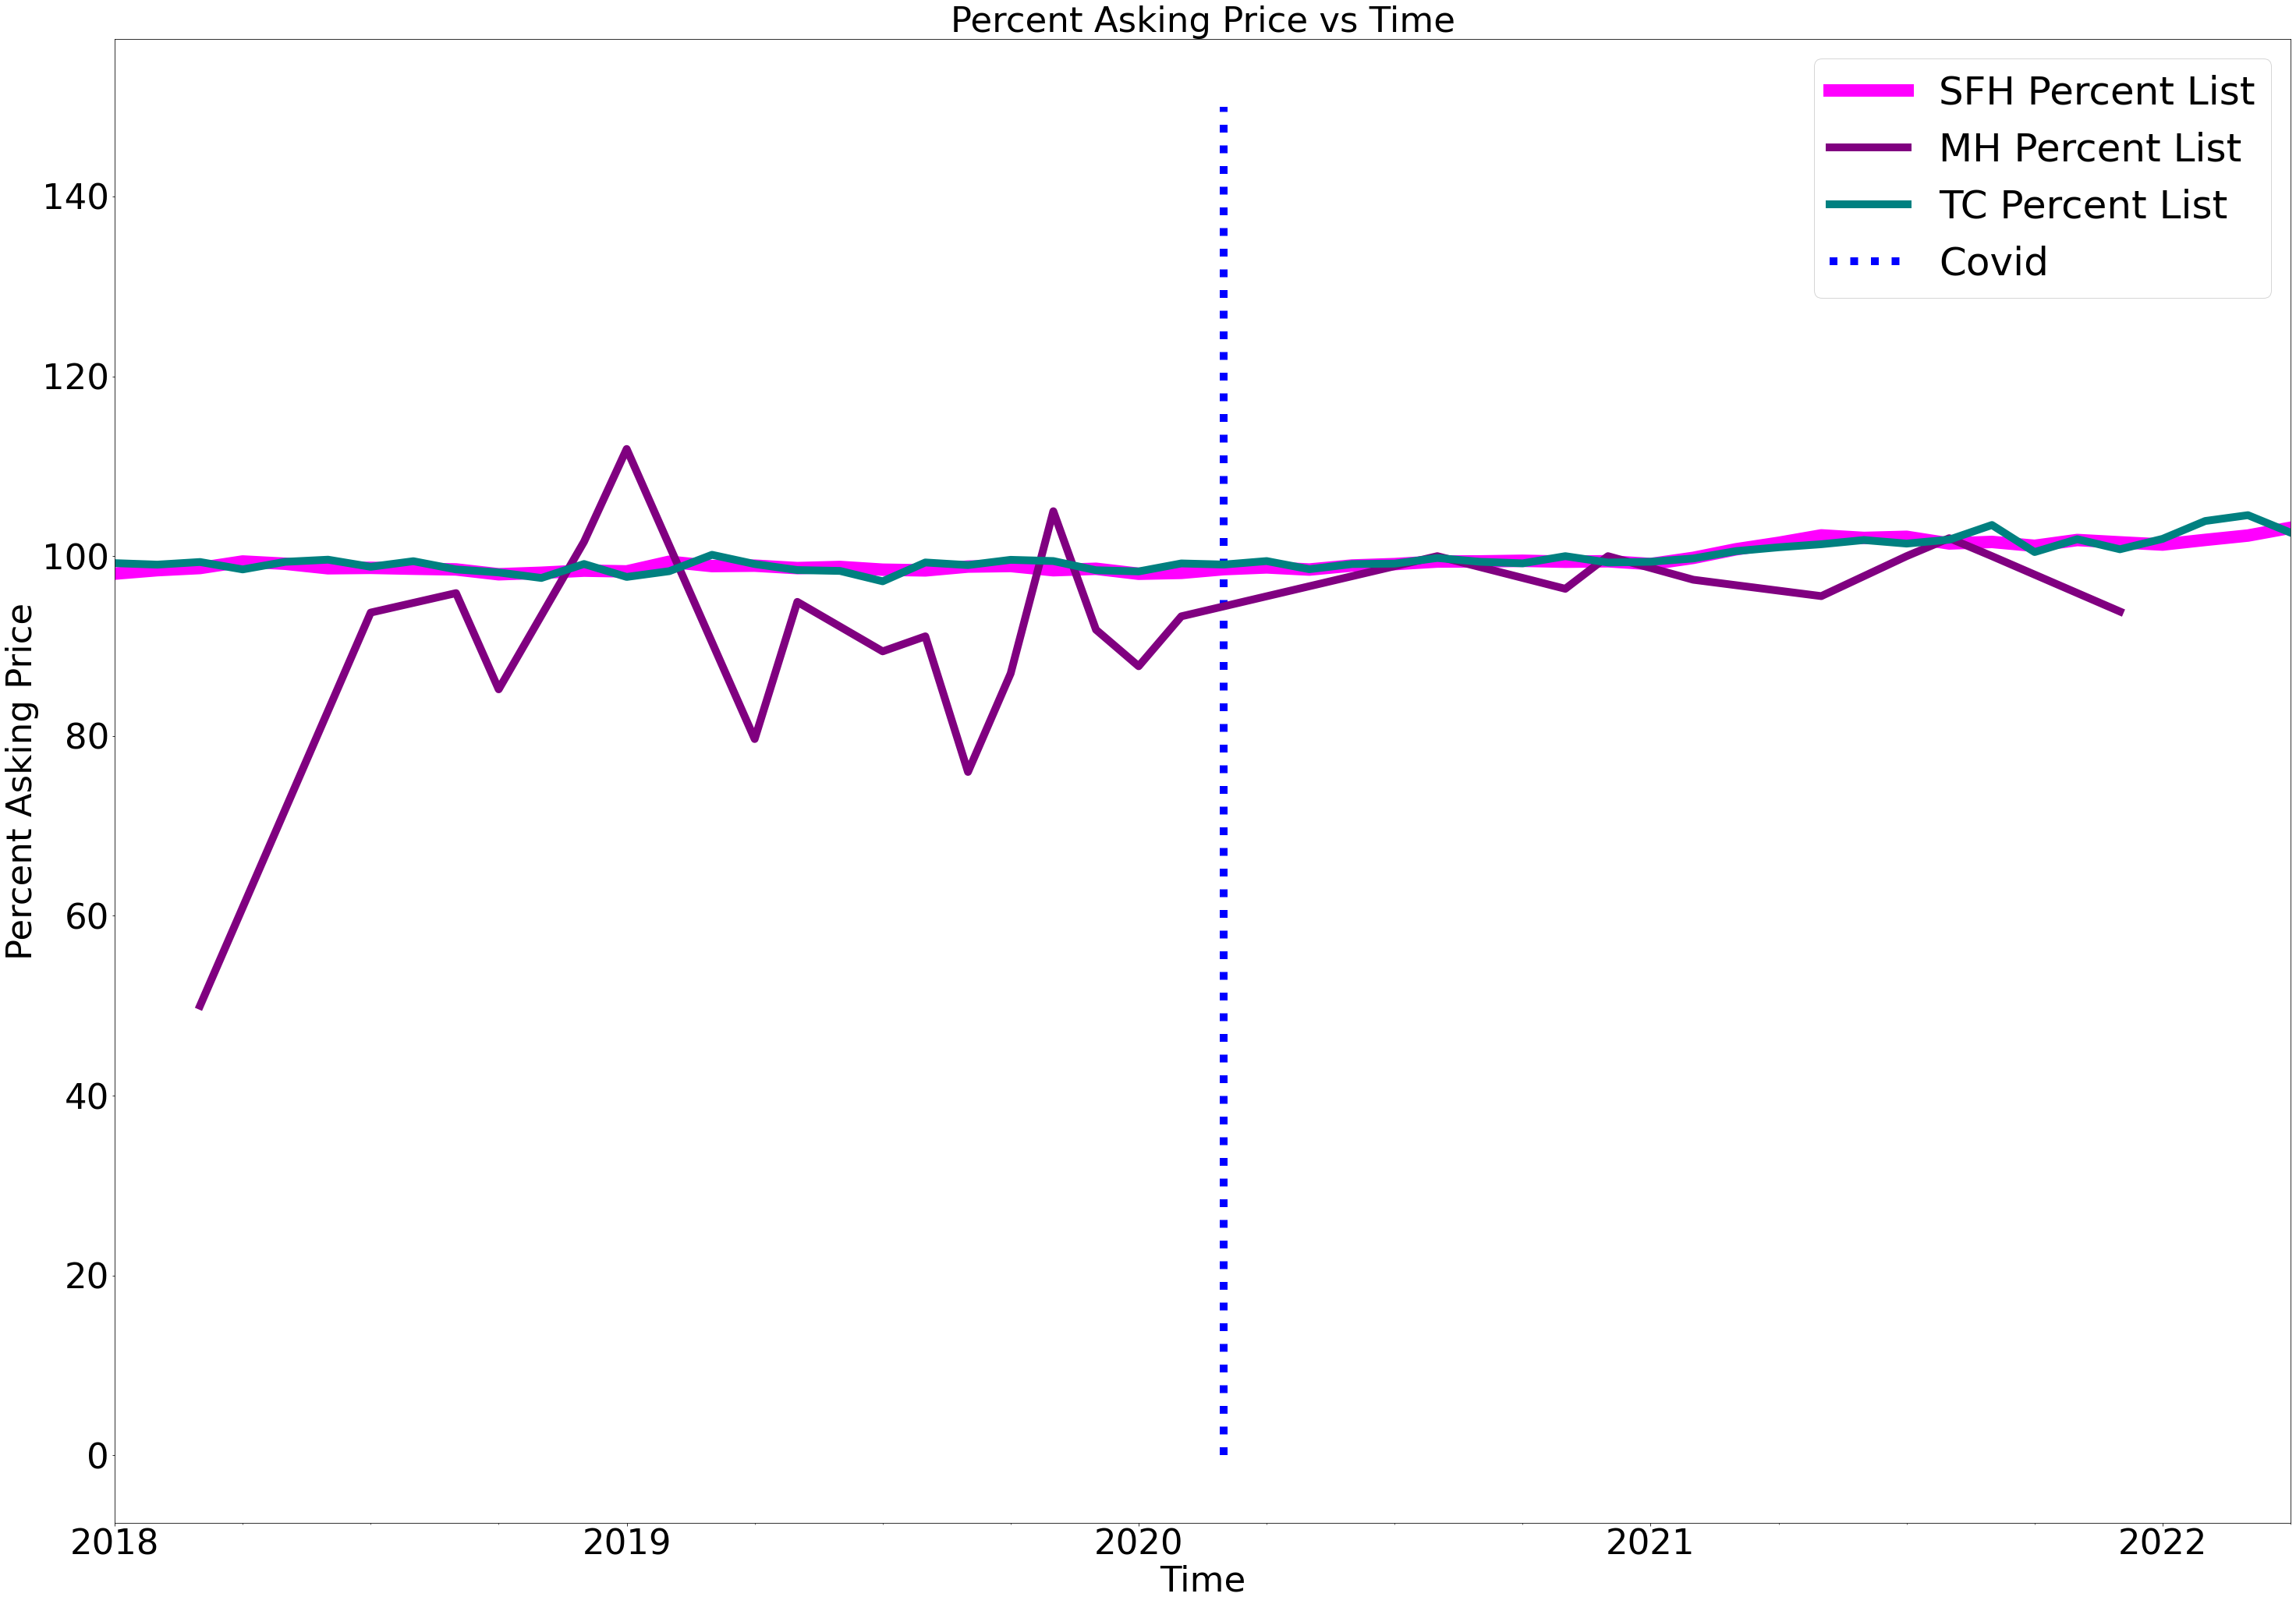

In [97]:
# #line plot
plt.figure(figsize=(50,35))
s_group['Percent List'].plot(label="SFH Percent List", lw=16, color="fuchsia")
mh_group['Percent List'].plot(label="MH Percent List", lw=10, color="purple")
tc_group['Percent List'].plot(label="TC Percent List",lw=10, color="teal")
plt.xticks(fontsize= 45)
plt.yticks(fontsize= 45)
plt.xlabel("Time", fontsize=45)
plt.ylabel("Percent Asking Price", fontsize=45)
plt.title('Percent Asking Price vs Time', fontsize=45)
plt.vlines("2020-03", 0, 150, colors='blue',linestyles='dotted', lw=10, label='Covid')
plt.legend(prop={'size': 50})
plt.savefig('Percent Asking Price vs Time.png')
plt.show()


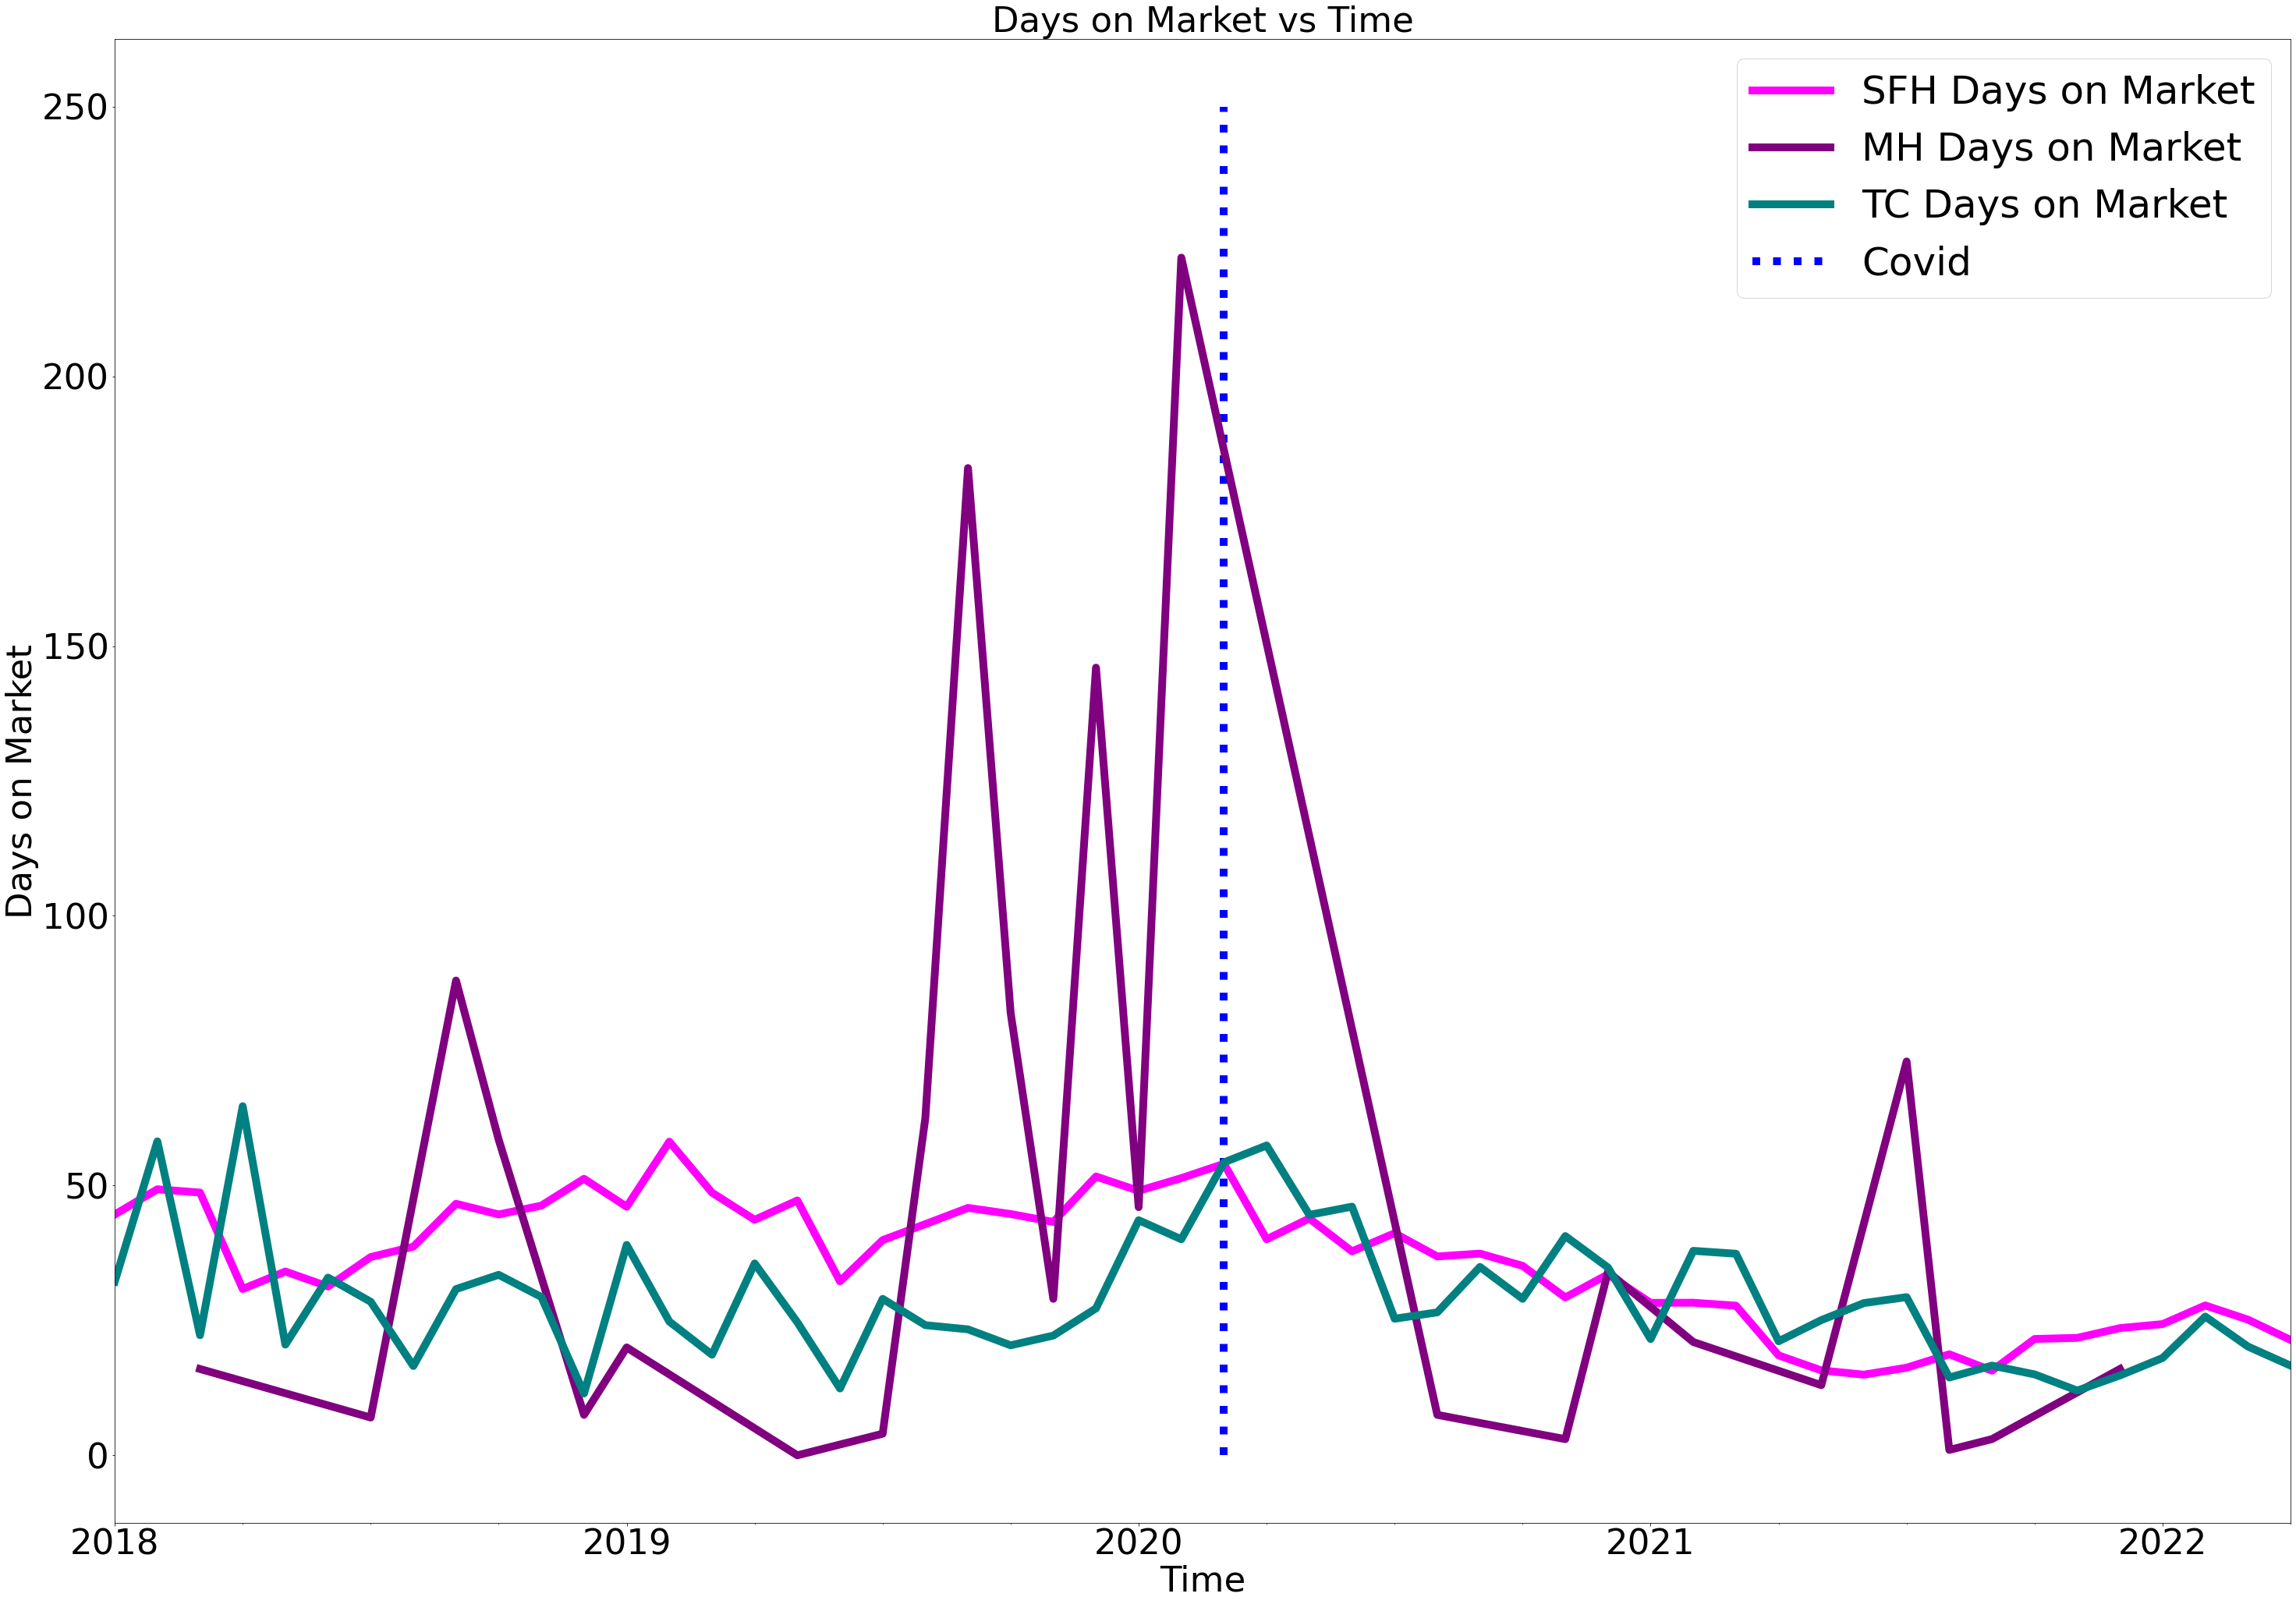

In [96]:
plt.figure(figsize=(50,35))
s_group['Ttl Days on Market'].plot(label="SFH Days on Market",lw=10, color="fuchsia")
mh_group['Ttl Days on Market'].plot(label="MH Days on Market", lw=10, color="purple")
tc_group['Ttl Days on Market'].plot(label="TC Days on Market", lw=10, color="teal")
plt.xlabel("Time", fontsize= 45)
plt.xticks(fontsize= 45)
plt.yticks(fontsize= 45)
plt.ylabel("Days on Market",fontsize= 45 )
plt.title('Days on Market vs Time', fontsize= 45)
plt.vlines("2020-03", 0, 250, colors='blue',linestyles='dotted', lw=10, label='Covid')
plt.legend(prop={'size': 50})
plt.savefig('Days on Market vs Time.png') 
plt.show()
          